In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

%matplotlib inline

In [80]:
#df=pd.read_csv('Part2_with_venues.csv')

In [158]:
#df.head

In [82]:
#df = df.drop(df[df.Address == 'Andover Village,Tampa,FL'].index)

##### First, I started by gettting clusters of coordinates of the neighborhoods.

In [83]:
latitude, longitude = df[['lat','lon']].mean() # use the mean coordinates to center the map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)
#map_clusters

In [104]:
n_clusters = 5
km_geo = KMeans(n_clusters = n_clusters, random_state = 1)
km_geo.fit(df[['lat','lon']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

2 3 4 5 6 7 8 9 10 11 12 13 14 

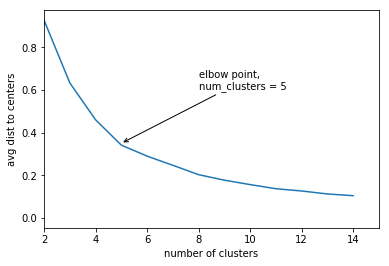

In [108]:
# How many clusters do we need? 

max_n_clusters =15
squared_distance = np.zeros(max_n_clusters)
for k in range(2,max_n_clusters):
    kmeans = KMeans(n_clusters = k, random_state = 0).fit(df[['lat','lon']])
    squared_distance[k] = kmeans.inertia_
    print(k,sep=' ', end=' ', flush=True)
    

plt.figure()
plt.plot(squared_distance)
plt.xlim((2,max_n_clusters))
plt.xlabel('number of clusters')
plt.ylabel('avg dist to centers')
plt.annotate("elbow point,\nnum_clusters = 5", xy=(5, .35), xytext=(8, .6), arrowprops={'arrowstyle':"->"})
plt.show()

In [110]:
df['cluster'] = km_geo.labels_
km_geo.labels_ # these are the cluster assignments, let's add them as a separate field to our dataframe

array([3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 2, 3, 3, 3, 3, 1, 4, 4, 3, 3, 0, 1, 4,
       1, 4, 3, 3, 0, 0, 4, 4, 2, 3, 3, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 3, 4,
       4, 1, 4, 1, 4, 1, 3, 4, 2, 0, 3, 1, 1, 3, 4, 3, 3, 1, 1, 3, 3, 4, 4,
       1, 1, 3, 1, 4, 2, 0, 0, 4, 2, 3, 1, 1, 1, 1, 1, 1, 3, 4, 1, 1, 0, 0,
       4, 1, 3, 0, 0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 1, 2, 4, 1, 1, 2, 4, 4,
       3, 3, 2, 2, 4, 4, 4, 4, 3, 3, 2, 3, 3, 2, 4, 3, 3, 4, 3, 2, 3, 3, 1,
       3, 3, 4, 4, 1, 1, 1, 0, 0, 2, 3, 3, 1, 1, 4, 0, 4, 4, 3, 0, 4, 3, 1,
       1, 1, 1, 1, 3, 3, 1, 3, 4, 3, 3, 1, 3, 0, 3, 3, 3, 1, 3, 4, 0, 3, 4,
       3, 3, 2, 1, 0, 2, 3, 4, 2, 3, 3, 4, 1, 0, 0, 1, 4, 4, 1, 1, 1, 2, 2,
       3, 1, 1, 3, 3, 3, 3, 0, 3, 3, 0, 1, 2, 4, 0, 4, 3, 4, 0, 4, 2, 1, 2,
       4, 3, 1, 3, 3, 3, 3, 1, 4, 4, 0, 3, 4, 1, 4, 3, 2, 3, 3, 3, 3, 0, 3,
       3, 4, 3, 3, 3, 1], dtype=int32)

In [111]:
df.groupby('cluster')[['lat','lon']].mean()

,lat,lon
cluster,,
0,27.888908,-82.496605
1,28.047865,-82.447158
2,28.130707,-82.349861
3,27.952497,-82.443794
4,27.969353,-82.510236


Map of Tampa boundaries and surrounding area for reference of clusters.
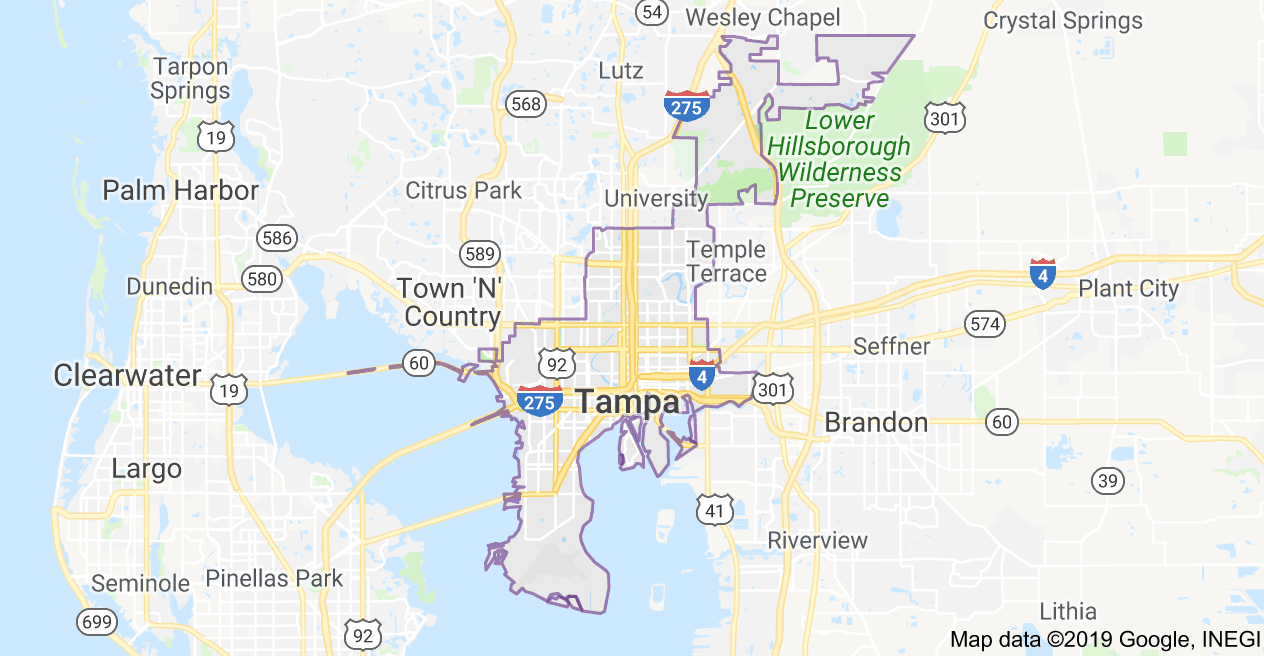

In [112]:
cluster_coords = df.groupby('cluster')[['lat','lon']].mean().to_dict('records')
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

for coord in cluster_coords:
    cm = folium.Marker(
        [coord['lat'],coord['lon']],
    )
    cm.add_to(map_clusters)
    
map_clusters

Each cluster seems to be around its own main area of intererst like a universtiy, natrue reserve, a river, the ocean, an airport, etc.  I had expected there to be clusters more tightly packed like there are by the ocean and airports.  Not much can be said about each cluster, since it is just the clusters of the neighborhoods

##### Second, I added some of the socioeconomic data
I am aiming to find the coorelation between the household income, rent, and average age of males and females.  

In [114]:
cols = ['Median_household_income','Median_rent','Median_age_of_males','Median_age_of_females','lat','lon',]
df[cols].head()

,Median_household_income,Median_rent,Median_age_of_males,Median_age_of_females,lat,lon
0,34397,744,25.6,27.8,27.990603,-82.440910
1,94049,1267,40.4,26.8,27.939329,-82.462079
2,35375,641,43.8,36.3,27.961705,-82.445686
3,38596,854,51.1,55.1,27.955385,-82.445416
4,82750,1752,42.3,41.4,27.947760,-82.458444


In [115]:
X = MinMaxScaler().fit_transform(df[cols])
X[0,:]

/opt/anaconda3/envs/jh/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([ 0.15354603,  0.34272076,  0.39297125,  0.39371257,  0.48587358,
        0.50188225])

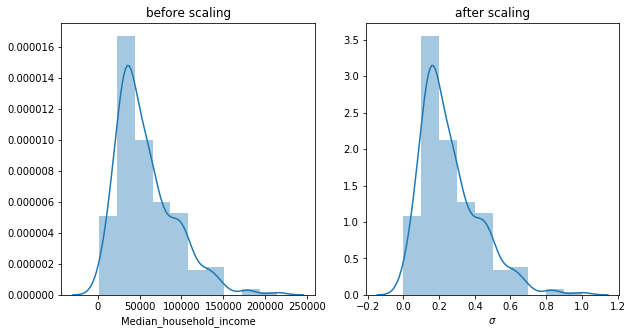

In [117]:
plt.figure(figsize = (10,5)) # create a figure of 10x5 inches
ax1 = plt.subplot(121) # create a subplot, there will be 1 row, 2 columns, and this is the 1st subplot, hence 121
ax1.set_title('before scaling')
sns.distplot(df.Median_household_income, ax = ax1, bins = 10) 
ax2 = plt.subplot(122) # create a subplot, there will be 1 row, 2 columns, and this is the 2nd subplot, hence 122
ax2.set_title('after scaling')
ax2.set_xlabel('$\sigma$')
sns.distplot(X[:,0], ax = ax2, bins = 10)

2 3 4 5 6 7 8 9 10 11 12 13 14 

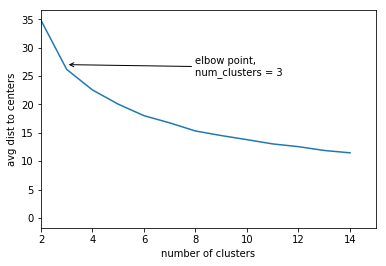

In [125]:
# How many clusters do we need? 

max_n_clusters = 15
squared_distance = np.zeros(max_n_clusters)
for k in range(2,max_n_clusters):
    kmeans = KMeans(n_clusters = k, random_state = 0).fit(X)
    squared_distance[k] = kmeans.inertia_
    print(k,sep=' ', end=' ', flush=True)

plt.figure()
plt.plot(squared_distance)
plt.xlim((2,max_n_clusters))
plt.xlabel('number of clusters')
plt.ylabel('avg dist to centers')
plt.annotate("elbow point,\nnum_clusters = 3", xy=(3, 27), xytext=(8, 25), arrowprops={'arrowstyle':"->"})
plt.show()

Three looks to be the steepest elbow, so I chose that as a low point.  

In [120]:
km = KMeans(n_clusters = 3, random_state = 0).fit(X)
km.fit(df[cols])

df['cluster'] = km.labels_

df.groupby('cluster')[cols].mean().sort_values(by='Median_household_income')

,Median_household_income,Median_rent,Median_age_of_males,Median_age_of_females,lat,lon
cluster,,,,,,
2,30171.944000,701.384000,33.160800,34.979200,27.985505,-82.457267
0,62663.578313,1008.325301,40.877108,41.973494,27.999304,-82.448211
1,114048.137255,1330.764706,42.625490,41.394118,27.960700,-82.470832


After the clustering, I have come to the conclusion that there are three very distinct groups of households with very differnt incomes.  The average rent correlates correctly to the income, and you can see that in average rent goes up with income going up.  The group of males and females that are the youngest are earning the least amount of income and spending the least on their rent.  The next two clusters with higher income are relatively around the same age.  

In [131]:
#Shows the three cluster centers.  
cluster_coords = df.groupby('cluster')[['lat','lon']].mean().to_dict('records')
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

for coord in cluster_coords:
    cm = folium.Marker(
        [coord['lat'],coord['lon']],
    )
    cm.add_to(map_clusters)
    
map_clusters

In [129]:
#shows all the locations in each cluster.
def show_cluster(cluster_no):
    map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)
    house_coords = df[df.cluster == cluster_no][['lat','lon','Median_household_income']].to_dict('records')

    for coord in house_coords:
        label_text = "Median_household_income: %d"%(coord['Median_household_income'])
        label = folium.Popup(label_text, parse_html=True)

        cm = folium.Marker(
            [coord['lat'],coord['lon']],
            popup = label,
        )
        cm.add_to(map_clusters)

    return map_clusters
    
show_cluster(1)

##### Third, I chose these columns to see if the areas that have more things to do with nightlife and partying have more older or younger males in them.  

In [150]:
cols = ['Median_age_of_males','Music Venue','Beer Garden','Strip Club','Pub','Nightclub','Liquor Store','Bar','lat','lon']
df[cols].head()

,Median_age_of_males,Music Venue,Beer Garden,Strip Club,Pub,Nightclub,Liquor Store,Bar,lat,lon
0,25.6,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,27.990603,-82.440910
1,40.4,0.000000,0.000000,0.000000,0.066667,0.000000,0.0,0.000000,27.939329,-82.462079
2,43.8,0.051282,0.000000,0.000000,0.000000,0.051282,0.0,0.051282,27.961705,-82.445686
3,51.1,0.000000,0.000000,0.111111,0.000000,0.000000,0.0,0.000000,27.955385,-82.445416
4,42.3,0.000000,0.019608,0.000000,0.000000,0.000000,0.0,0.058824,27.947760,-82.458444


In [151]:
X = MinMaxScaler().fit_transform(df[cols])
X[0,:]

array([ 0.39297125,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.48587358,  0.50188225])

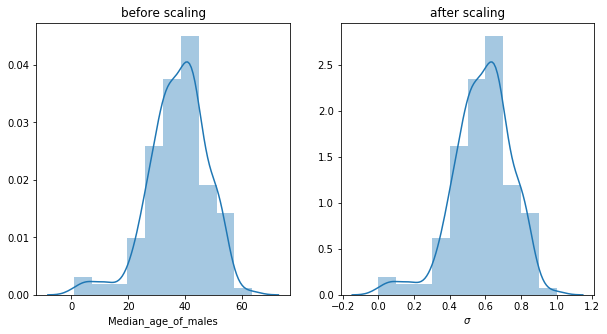

In [152]:
plt.figure(figsize = (10,5)) # create a figure of 10x5 inches
ax1 = plt.subplot(121) # create a subplot, there will be 1 row, 2 columns, and this is the 1st subplot, hence 121
ax1.set_title('before scaling')
sns.distplot(df.Median_age_of_males, ax = ax1, bins = 10)  
ax2 = plt.subplot(122) # create a subplot, there will be 1 row, 2 columns, and this is the 2nd subplot, hence 122
ax2.set_title('after scaling')
ax2.set_xlabel('$\sigma$')
sns.distplot(X[:,0], ax = ax2, bins = 10)

2 3 4 5 6 7 8 9 10 11 12 13 14 

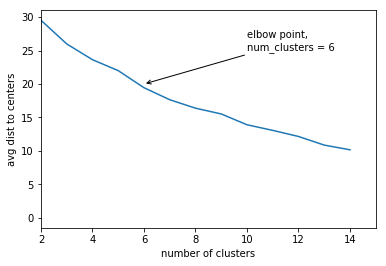

In [153]:
# How many clusters do we need? 

max_n_clusters = 15
squared_distance = np.zeros(max_n_clusters)
for k in range(2,max_n_clusters):
    kmeans = KMeans(n_clusters = k, random_state = 0).fit(X)
    squared_distance[k] = kmeans.inertia_
    print(k,sep=' ', end=' ', flush=True)

plt.figure()
plt.plot(squared_distance)
plt.xlim((2,max_n_clusters))
plt.xlabel('number of clusters')
plt.ylabel('avg dist to centers')
plt.annotate("elbow point,\nnum_clusters = 6", xy=(6, 20), xytext=(10, 25), arrowprops={'arrowstyle':"->"})
plt.show()

It is hard to tell where the elbow is actually at, so I chose six arbitrarily.  

In [142]:
#Shows the six cluster centers.  
cluster_coords = df.groupby('cluster')[['lat','lon']].mean().to_dict('records')
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

for coord in cluster_coords:
    cm = folium.Marker(
        [coord['lat'],coord['lon']],
    )
    cm.add_to(map_clusters)
    
map_clusters

I think these cluster centers are fairly close together because most of the nightlife would be towards the center of town like these clusters are.  

In [139]:
km = KMeans(n_clusters = 6, random_state = 0).fit(X)
km.fit(df[cols])

df['cluster'] = km.labels_

df.groupby('cluster')[cols].mean().sort_values(by='Median_age_of_males')

,Median_age_of_males,Music Venue,Beer Garden,Strip Club,Pub,Nightclub,Liquor Store,Bar,lat,lon
cluster,,,,,,,,,,
2,8.730000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.091667,27.978184,-82.468196
1,26.042500,0.000000,0.001389,0.000000,0.000000,0.000000,0.000000,0.002500,27.974557,-82.456379
3,33.569118,0.001213,0.001427,0.006740,0.004357,0.004216,0.004289,0.016186,27.995111,-82.448501
5,39.957895,0.002466,0.000675,0.000237,0.004793,0.001481,0.000000,0.020962,27.975603,-82.457627
0,44.726531,0.002393,0.000000,0.000000,0.004835,0.006582,0.000816,0.006086,27.979677,-82.468462
4,52.311429,0.005133,0.002868,0.003175,0.000000,0.000000,0.001058,0.019650,28.002313,-82.454224


After the clustering, I can see that the correlation between age of males and the nightlife around them varries drastically between a few age groups, and not so much between others.  In cluster 2 where the medain age is around 9, there is not a lot of nightlife activites and adult things to do, which is very good for those children.  The one that surprised me the most, was that the younger adults in cluster 1, do not have a lot of nightlife aorund them.  It is people in clusters 3 or 5 who have the most nightlife activities.

In [144]:
#shows all the locations in each cluster.
def show_cluster(cluster_no):
    map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)
    house_coords = df[df.cluster == cluster_no][['lat','lon','Median_age_of_males']].to_dict('records')

    for coord in house_coords:
        label_text = "Median age of males: %d"%(coord['Median_age_of_males'])
        label = folium.Popup(label_text, parse_html=True)

        cm = folium.Marker(
            [coord['lat'],coord['lon']],
            popup = label,
        )
        cm.add_to(map_clusters)

    return map_clusters
    
show_cluster(5)

##### For the final clustering, I chose outdoor places and activites to see what areas have the most activities that can be done outside, in relation to the population density of the area.  

In [191]:
cols = ['Population_density','Baseball Field','Beach','Disc Golf','Dog Run','Golf Course','Playground','Pool','Tennis Court','Theme Park Ride / Attraction','Trail','lat','lon']
df[cols].head()

,Population_density,Baseball Field,Beach,Disc Golf,Dog Run,Golf Course,Playground,Pool,Tennis Court,Theme Park Ride / Attraction,Trail,lat,lon
0,1565,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,27.990603,-82.440910
1,4316,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.066667,27.939329,-82.462079
2,1853,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,27.961705,-82.445686
3,2412,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.000000,27.955385,-82.445416
4,4972,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,27.947760,-82.458444


In [192]:
X = MinMaxScaler().fit_transform(df[cols])
X[0,:]

/opt/anaconda3/envs/jh/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([ 0.06457412,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.48587358,  0.50188225])

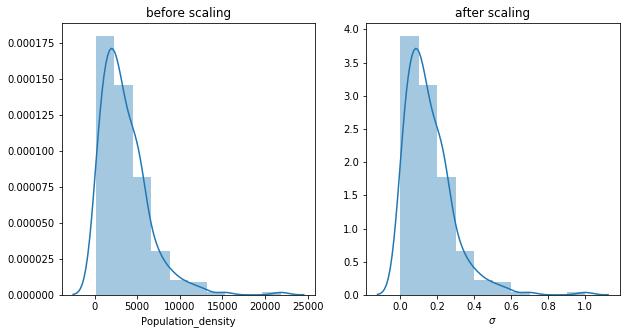

In [193]:
plt.figure(figsize = (10,5)) # create a figure of 10x5 inches
ax1 = plt.subplot(121) # create a subplot, there will be 1 row, 2 columns, and this is the 1st subplot, hence 121
ax1.set_title('before scaling')
sns.distplot(df.Population_density, ax = ax1, bins = 10) # draw df.Area distribution on subplot ax1
ax2 = plt.subplot(122) # create a subplot, there will be 1 row, 2 columns, and this is the 2nd subplot, hence 122
ax2.set_title('after scaling')
ax2.set_xlabel('$\sigma$')
sns.distplot(X[:,0], ax = ax2, bins = 10)

2 3 4 5 6 7 8 9 10 11 12 13 14 

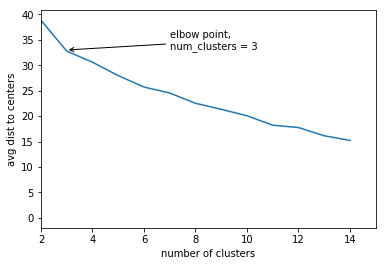

In [194]:
# How many clusters do we need? 

max_n_clusters = 15
squared_distance = np.zeros(max_n_clusters)
for k in range(2,max_n_clusters):
    kmeans = KMeans(n_clusters = k, random_state = 0).fit(X)
    squared_distance[k] = kmeans.inertia_
    print(k,sep=' ', end=' ', flush=True)

plt.figure()
plt.plot(squared_distance)
plt.xlim((2,max_n_clusters))
plt.xlabel('number of clusters')
plt.ylabel('avg dist to centers')
plt.annotate("elbow point,\nnum_clusters = 3", xy=(3, 33), xytext=(7, 33), arrowprops={'arrowstyle':"->"})
plt.show()

I chose three as the elbow point becasue it seems to have the biggest bend compare to the rest being fairly gradual.  

In [195]:
km = KMeans(n_clusters = 3, random_state = 0).fit(X)
km.fit(df[cols])

df['cluster'] = km.labels_

df.groupby('cluster')[cols].mean().sort_values(by='Population_density')

,Population_density,Baseball Field,Beach,Disc Golf,Dog Run,Golf Course,Playground,Pool,Tennis Court,Theme Park Ride / Attraction,Trail,lat,lon
cluster,,,,,,,,,,,,,
1,1706.034014,0.008950,0.012472,0.001361,0.006352,0.010538,0.001743,0.013119,0.001002,0.003214,0.004989,27.989665,-82.456438
2,4994.268817,0.006326,0.003943,0.000000,0.003072,0.001344,0.013441,0.018015,0.006228,0.001434,0.010666,27.978679,-82.459341
0,10666.684211,0.019737,0.048246,0.000000,0.000000,0.002105,0.000000,0.013158,0.004785,0.000000,0.017544,27.980431,-82.450383


After the clustering, we can see that there is some correlation between the population density and outdoor activities available near the cluster.  The cluster with the lowest population density, cluster 1, seems to have the highest amout of outdoor activities available in it.  The second cluster has the second most, and the third, cluster 0, has the least.  

In [189]:
#Shows the three cluster centers.  
cluster_coords = df.groupby('cluster')[['lat','lon']].mean().to_dict('records')
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

for coord in cluster_coords:
    cm = folium.Marker(
        [coord['lat'],coord['lon']],
    )
    cm.add_to(map_clusters)
    
map_clusters

The clusters here are very close together and towards the center of the town.  This tells me that the neighborhood population density varries a lot throuhgout the whole city, along with the number of outdoor activites in each neighborhood do too.  

In [190]:
#shows all the locations in each cluster.
def show_cluster(cluster_no):
    map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)
    house_coords = df[df.cluster == cluster_no][['lat','lon','Population_density']].to_dict('records')

    for coord in house_coords:
        label_text = "Population density: %d"%(coord['Population_density'])
        label = folium.Popup(label_text, parse_html=True)

        cm = folium.Marker(
            [coord['lat'],coord['lon']],
            popup = label,
        )
        cm.add_to(map_clusters)

    return map_clusters
    
show_cluster(1)